# Import Modules

In [158]:
from glob import glob
import geopandas as gp
import numpy as np
import pandas as pd
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
import random
import os
from shapely.geometry import Point

pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings("ignore")

try:
    if kernel_is_loaded:
        pass
except:
    os.chdir('/'.join(os.getcwd().split('/')[:-1]))
    kernel_is_loaded = True

# Seeding

In [159]:
def seed_everything(seed = 42):
    random.seed(seed)
    np.random.seed(seed)
    
seed_everything()

In [160]:
rice = pd.read_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/entire_Rice_with_ndvi.csv')
print(rice.shape)

display(rice.head(3))


(403, 23)


,date_time,typeofcrop,geometry,dtname,stname,dec_2f,jan_1f,jan_2f,feb_1f,feb_2f,...,apr_2f,may_1f,may_2f,jun_1f,jun_2f,jul_1f,jul_2f,aug_1f,aug_2f,Crop type
0,45043,paddy,POINT (81.62672456000001 16.529149009999998),West Godavari,ANDHRA PRADESH,145,122,121,130,135,...,167,158,137,119,141,145,118,125,133,Rice
1,44951,paddy,POINT (76.69392186450001 15.763552200999996),Raichur,KARNATAKA,126,137,153,178,181,...,142,121,143,138,133,113,104,122,125,Rice
2,44951,paddy,POINT (76.578259434 15.771603985999999),Raichur,KARNATAKA,124,149,159,173,172,...,146,125,127,121,116,123,102,124,115,Rice


In [161]:
rice.stname.value_counts()

stname
ANDHRA PRADESH    133
KARNATAKA         129
ODISHA             96
TELANGANA          45
Name: count, dtype: int64

# Data Visulization

<Axes: >

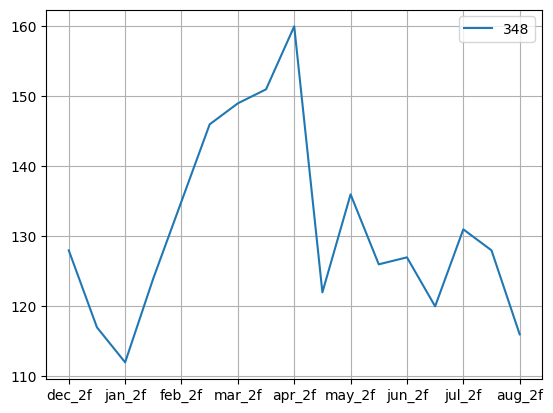

In [162]:
plt.rcParams['axes.grid'] = True
rice.loc[:,'dec_2f':'aug_2f'].sample(1, random_state=47).T.plot()

In [163]:
months = ['dec_2f','jan_1f', 'jan_2f', 'feb_1f', 'feb_2f', 'mar_1f', 'mar_2f', 'apr_1f', 'apr_2f', 'may_1f', 'may_2f','jun_1f','jun_2f','jul_1f','jul_2f','aug_1f','aug_2f']
print(months)

['dec_2f', 'jan_1f', 'jan_2f', 'feb_1f', 'feb_2f', 'mar_1f', 'mar_2f', 'apr_1f', 'apr_2f', 'may_1f', 'may_2f', 'jun_1f', 'jun_2f', 'jul_1f', 'jul_2f', 'aug_1f', 'aug_2f']


In [164]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [165]:
lower_bounds = list(range(200, 110-1, -10))

# Initialize an empty dictionary to hold the counts for each range
counts_dict = {f'{lb}-{lb+10}': [] for lb in lower_bounds}

# Iterate through the columns of the 'rice' DataFrame
for column in months:
    # Calculate counts for each range and append to the counts_dict
    for lb in lower_bounds:
        ub = lb + 10
        counts = ((rice[column] >= lb) & (rice[column] < ub)).sum()
        counts_dict[f'{lb}-{ub}'].append(counts)

# Create a new DataFrame from the counts_dict
counts_df = pd.DataFrame(counts_dict, index=months)
df = counts_df.loc['dec_2f':'aug_2f'].T
display(df.style.apply(highlight_max,axis=0))


,dec_2f,jan_1f,jan_2f,feb_1f,feb_2f,mar_1f,mar_2f,apr_1f,apr_2f,may_1f,may_2f,jun_1f,jun_2f,jul_1f,jul_2f,aug_1f,aug_2f
200-210,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
190-200,0,0,0,0,0,5,6,7,0,0,0,0,0,0,3,0,1
180-190,0,1,4,23,37,66,61,46,8,7,1,0,0,1,3,4,2
170-180,2,3,20,63,108,121,123,106,79,44,14,1,3,2,8,6,14
160-170,8,13,49,107,108,98,112,99,76,27,23,18,6,10,22,12,32
150-160,23,23,77,68,58,47,60,65,70,18,24,24,20,17,22,25,42
140-150,70,66,85,58,38,46,25,36,60,35,34,29,31,29,44,43,44
130-140,118,105,66,43,33,17,10,22,41,68,81,86,57,42,67,94,74
120-130,158,154,62,34,18,3,5,22,59,159,136,140,77,60,91,123,92
110-120,24,35,38,6,2,0,0,0,9,41,90,90,117,95,72,58,77


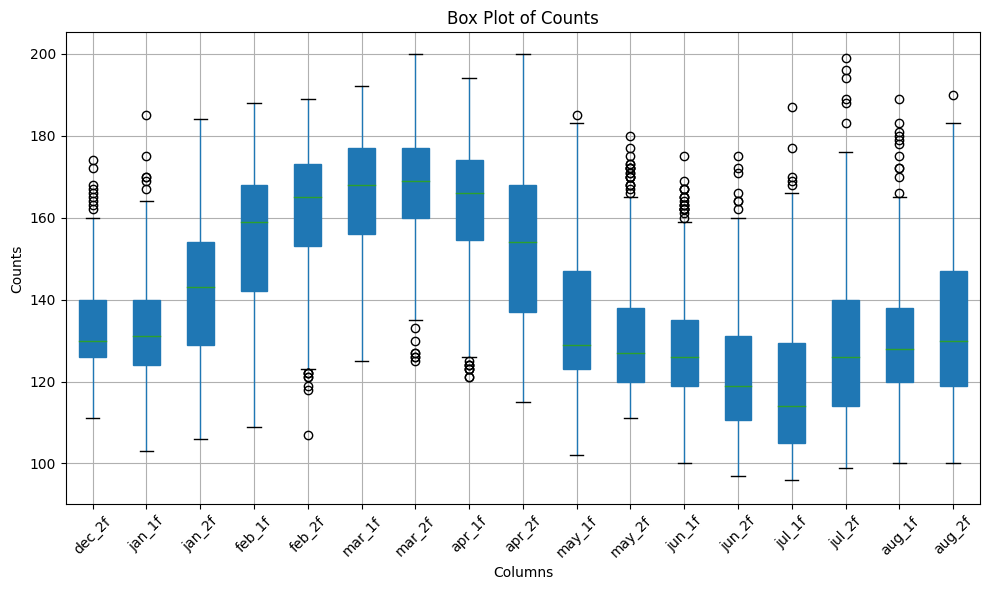

In [166]:
# Create a box plot for the DataFrame
plt.figure(figsize=(10, 6))  # Set the figure size
rice.loc[:,'dec_2f':'aug_2f'].boxplot(patch_artist =True)

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Counts')
plt.title('Box Plot of Counts')
        
plt.ylim(90)
# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [167]:
rice.describe().T

,count,mean,std,min,25%,50%,75%,max
date_time,403.0,44432.062035,322.154367,43858.0,44269.0,44296.0,44625.0,45043.0
dec_2f,403.0,133.104218,10.974373,111.0,126.0,130.0,140.0,174.0
jan_1f,403.0,132.841191,12.440489,103.0,124.0,131.0,140.0,185.0
jan_2f,403.0,142.955335,16.983838,106.0,129.0,143.0,154.0,184.0
feb_1f,403.0,155.456576,17.363683,109.0,142.0,159.0,168.0,188.0
feb_2f,403.0,161.049628,16.298598,107.0,153.0,165.0,173.0,189.0
mar_1f,403.0,165.784119,14.395465,125.0,156.0,168.0,177.0,192.0
mar_2f,403.0,167.250620,12.949163,125.0,160.0,169.0,177.0,200.0
apr_1f,403.0,162.771712,16.016238,121.0,154.5,166.0,174.0,194.0
apr_2f,403.0,152.064516,18.384392,115.0,137.0,154.0,168.0,200.0


# Data Cleaning

In [168]:
outliers = rice[rice.loc[:,'dec_2f':'mar_2f'].apply(lambda row:any((i == 1)|(i == 0) for i in row), axis=1)]

# Rows which have 0s or 1s in the 6 possible sowing periods for mustard are dropped
rice.drop(outliers.index, inplace=True)

display(f'{outliers.shape[0]} dropped', rice.loc[:,'dec_2f':'aug_2f'].describe().T)

'0 dropped'

,count,mean,std,min,25%,50%,75%,max
dec_2f,403.0,133.104218,10.974373,111.0,126.0,130.0,140.0,174.0
jan_1f,403.0,132.841191,12.440489,103.0,124.0,131.0,140.0,185.0
jan_2f,403.0,142.955335,16.983838,106.0,129.0,143.0,154.0,184.0
feb_1f,403.0,155.456576,17.363683,109.0,142.0,159.0,168.0,188.0
feb_2f,403.0,161.049628,16.298598,107.0,153.0,165.0,173.0,189.0
mar_1f,403.0,165.784119,14.395465,125.0,156.0,168.0,177.0,192.0
mar_2f,403.0,167.250620,12.949163,125.0,160.0,169.0,177.0,200.0
apr_1f,403.0,162.771712,16.016238,121.0,154.5,166.0,174.0,194.0
apr_2f,403.0,152.064516,18.384392,115.0,137.0,154.0,168.0,200.0
may_1f,403.0,137.126551,19.430994,102.0,123.0,129.0,147.0,185.0


In [169]:
def harvest_avg_impute(row):
    lst = deepcopy(row)
    hrvst_strt_idx = lst.index.get_loc('apr_1f')
    for i in range(len(lst.loc['apr_1f':'may_2f'])):
        actual_idx = i + hrvst_strt_idx
        if (lst[actual_idx] == 1) or (lst[actual_idx] == 0):
            if lst[actual_idx-1] < 140:
                lst[actual_idx] = (lst[actual_idx-1] + lst[actual_idx+1])/2
    return lst

# Imputing the possible harvest fns with the average of its immediate neighbours
rice = rice.apply(harvest_avg_impute, axis=1)

new_outliers = rice[rice.loc[:,'apr_1f':'may_2f'].apply(lambda row:any((i == 1)|(i == 0) for i in row), axis=1)]
outliers = pd.concat([outliers, new_outliers])

# if 0s and 1s still exit in the possible harvest periods, those rows are dropped
rice.drop(new_outliers.index, inplace=True)

display(f'{new_outliers.shape[0]} dropped', rice.loc[:,'dec_2f':'aug_2f'].describe().T)

'0 dropped'

,count,mean,std,min,25%,50%,75%,max
dec_2f,403.0,133.104218,10.974373,111.0,126.0,130.0,140.0,174.0
jan_1f,403.0,132.841191,12.440489,103.0,124.0,131.0,140.0,185.0
jan_2f,403.0,142.955335,16.983838,106.0,129.0,143.0,154.0,184.0
feb_1f,403.0,155.456576,17.363683,109.0,142.0,159.0,168.0,188.0
feb_2f,403.0,161.049628,16.298598,107.0,153.0,165.0,173.0,189.0
mar_1f,403.0,165.784119,14.395465,125.0,156.0,168.0,177.0,192.0
mar_2f,403.0,167.250620,12.949163,125.0,160.0,169.0,177.0,200.0
apr_1f,403.0,162.771712,16.016238,121.0,154.5,166.0,174.0,194.0
apr_2f,403.0,152.064516,18.384392,115.0,137.0,154.0,168.0,200.0
may_1f,403.0,137.126551,19.430994,102.0,123.0,129.0,147.0,185.0


In [170]:
# def dip_impute(row):
#     lst = deepcopy(row)
#     act_strt_idx = lst.index.get_loc('dec_1f')
#     for i in range(len(lst.loc['dec_1f':'jan_1f'])):
#         actual_idx = i + act_strt_idx
#         if (lst[actual_idx-1] - lst[actual_idx]) >= 20:
#             lst[actual_idx] = (lst[actual_idx-1] + lst[actual_idx+1])/2
#     return lst

# # Imputing the dec_1f, dec_2f and jan_1f fornights with the averages if the dip is not less than 30 from the adjs 
# potato = potato.apply(dip_impute, axis=1)

# potato.loc[:,'oct_2f':'apr_1f'].describe().T

# Smoothing Data 

In [171]:
display(rice.head(3))

,date_time,typeofcrop,geometry,dtname,stname,dec_2f,jan_1f,jan_2f,feb_1f,feb_2f,...,apr_2f,may_1f,may_2f,jun_1f,jun_2f,jul_1f,jul_2f,aug_1f,aug_2f,Crop type
0,45043,paddy,POINT (81.62672456000001 16.529149009999998),West Godavari,ANDHRA PRADESH,145,122,121,130,135,...,167,158,137,119,141,145,118,125,133,Rice
1,44951,paddy,POINT (76.69392186450001 15.763552200999996),Raichur,KARNATAKA,126,137,153,178,181,...,142,121,143,138,133,113,104,122,125,Rice
2,44951,paddy,POINT (76.578259434 15.771603985999999),Raichur,KARNATAKA,124,149,159,173,172,...,146,125,127,121,116,123,102,124,115,Rice


In [172]:
# from scipy.signal import savgol_filter

# # Define a function to apply the Savitzky-Golay filter to each row
# def smooth_row(row, window_length, polyorder):
#     numeric_values = row.loc['oct_1f':'jun_1f']  
#     smoothed_values = savgol_filter(numeric_values, window_length, polyorder)
#     return pd.Series(smoothed_values)

# # Define the window length and polynomial order
# window_length = 1  # Adjust the window length as needed
# polyorder = 1     # Adjust the polynomial order as needed

# # Apply the custom function row-wise to smoothen the values
# potato[columns] = potato.apply(lambda row: smooth_row(row, window_length, polyorder), axis=1)

# # Display the updated DataFrame
# display(potato)

<Axes: >

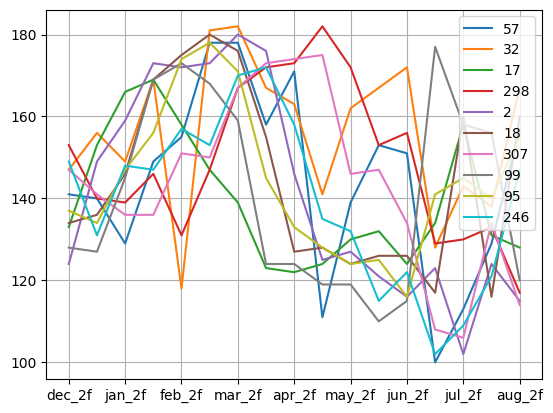

In [173]:
rice.loc[:,'dec_2f':'aug_2f'].sample(10, random_state=9).T.plot()

In [174]:
rice.describe().T

,count,mean,std,min,25%,50%,75%,max
date_time,403.0,44432.062035,322.154367,43858.0,44269.0,44296.0,44625.0,45043.0
dec_2f,403.0,133.104218,10.974373,111.0,126.0,130.0,140.0,174.0
jan_1f,403.0,132.841191,12.440489,103.0,124.0,131.0,140.0,185.0
jan_2f,403.0,142.955335,16.983838,106.0,129.0,143.0,154.0,184.0
feb_1f,403.0,155.456576,17.363683,109.0,142.0,159.0,168.0,188.0
feb_2f,403.0,161.049628,16.298598,107.0,153.0,165.0,173.0,189.0
mar_1f,403.0,165.784119,14.395465,125.0,156.0,168.0,177.0,192.0
mar_2f,403.0,167.250620,12.949163,125.0,160.0,169.0,177.0,200.0
apr_1f,403.0,162.771712,16.016238,121.0,154.5,166.0,174.0,194.0
apr_2f,403.0,152.064516,18.384392,115.0,137.0,154.0,168.0,200.0


# Determining sowing period

In [175]:
# Sowing period determination

threshold = 5

def sowing_period(row):
    sowing_periods = row.loc['dec_2f':'mar_2f'].index
    sowing_periods_NDVI = row.loc['dec_2f':'mar_2f']
    minima = np.argmin(sowing_periods_NDVI)
    ndvi_values = row.loc['dec_2f':'aug_2f']
    i = minima
    while i < len(sowing_periods):
        if 100 <= ndvi_values[i] <=140 :
            if (ndvi_values[i+1] - ndvi_values[i]) > threshold:
                if ((ndvi_values[i+4] - ndvi_values[i]) > 30):
                    return sowing_periods[i]
        i += 1
    return 'Unknown'

rice['sowing_period'] = rice.apply(sowing_period, axis=1)
# rice['sowing_year'] = [2023] * rice.shape[0]  # Update this based on sowing period change to be done

rice.sowing_period.value_counts()

sowing_period
jan_1f     141
dec_2f      84
jan_2f      76
Unknown     64
feb_1f      20
feb_2f      12
mar_1f       6
Name: count, dtype: int64

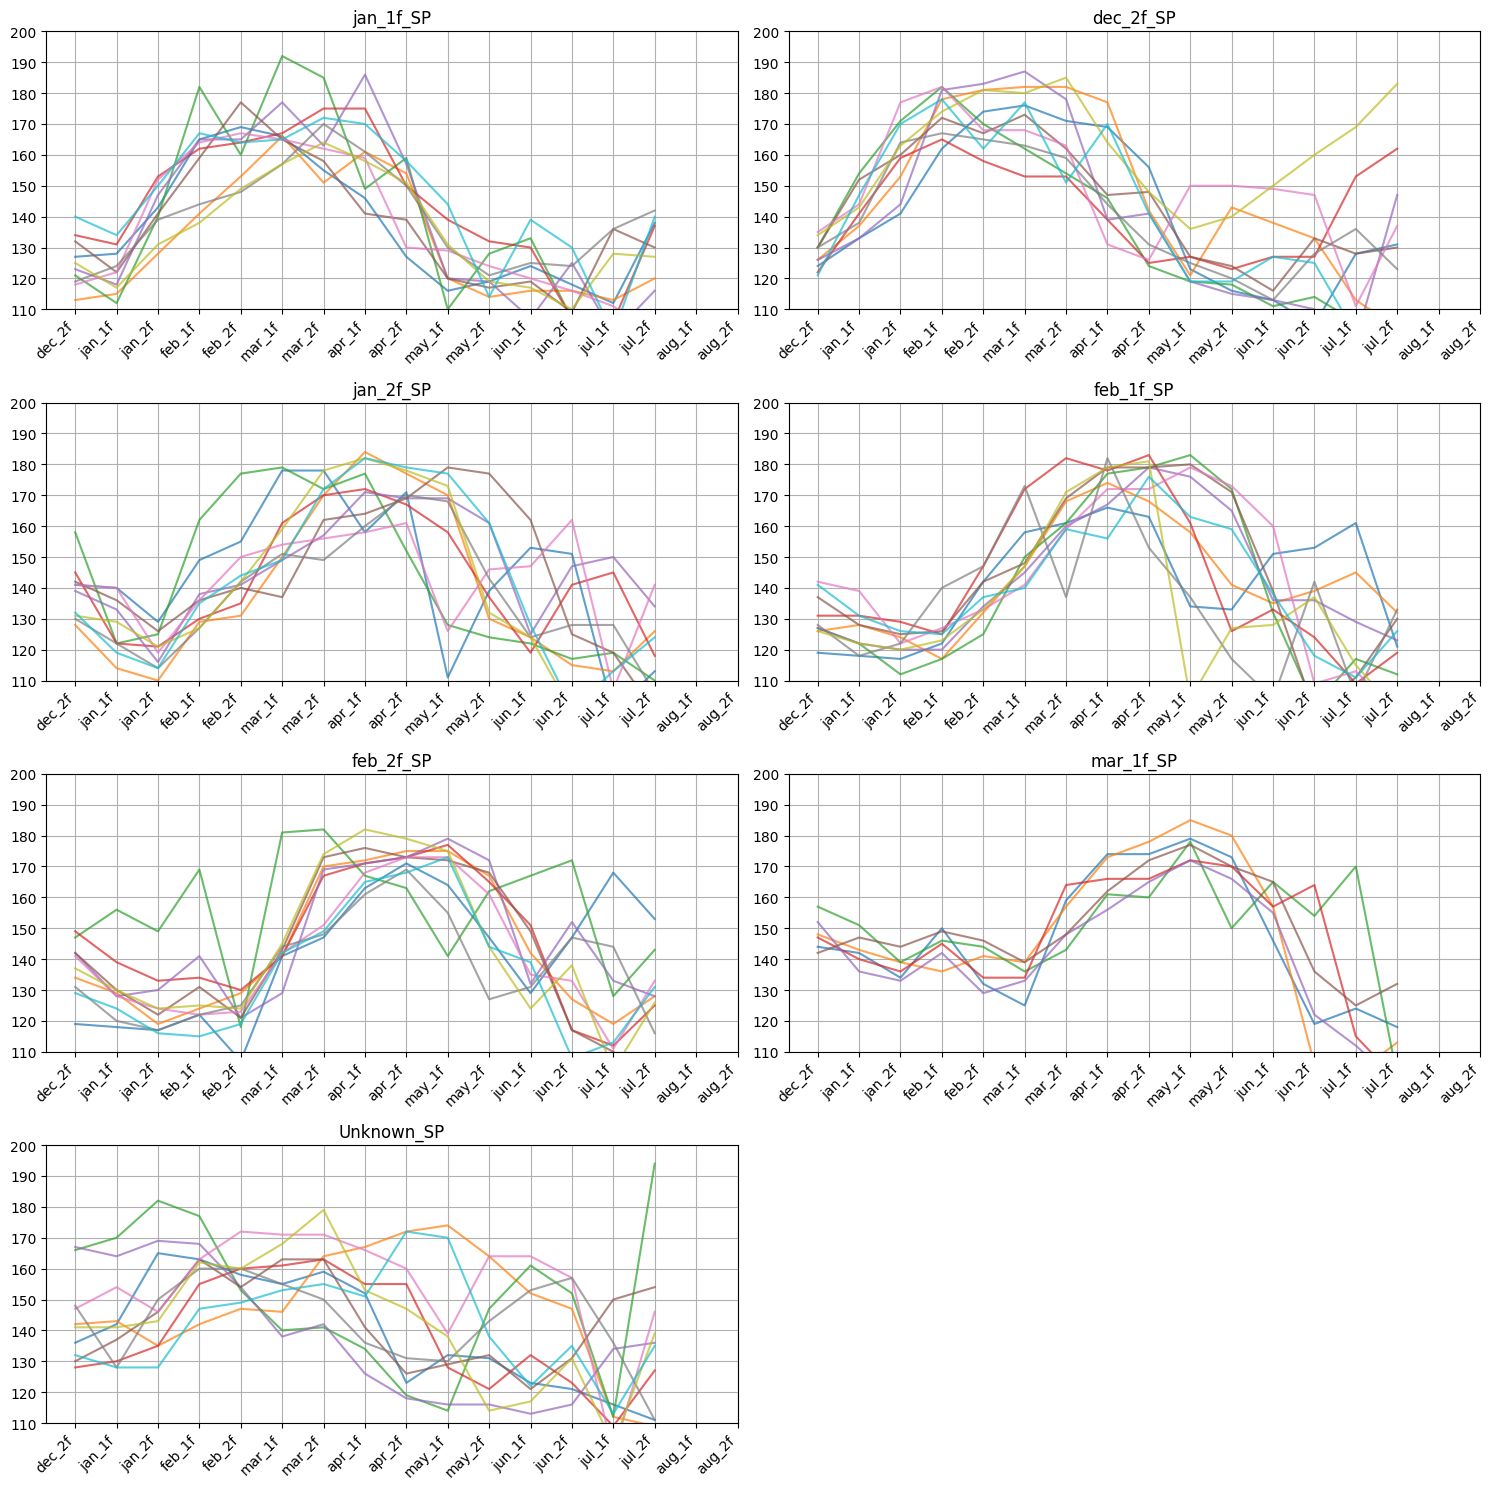

In [176]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter


# Apply Savitzky-Golay filter to each row and plot subplots based on 'sowing_period'
window_length = 5  # Adjust this value as needed
polyorder = 2  # Adjust this value as needed

# Get unique categories based on 'sowing_period'
categories = ['jan_1f','dec_2f','jan_2f','feb_1f','feb_2f','mar_1f','Unknown']

# Determine the number of rows and columns for subplots
num_categories = len(categories)
num_rows = (num_categories + 1) // 2  # Round up to ensure enough rows
num_cols = 2

# Create subplots for each category in a 2-column layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot data for each category
for i, category in enumerate(categories):
        category_data = rice[rice['sowing_period'] == category].loc[:, 'dec_2f':'jul_2f']
        rows = len(category_data)
        # print(rows)
        category_data = category_data.sample(min(10,rows),random_state=42)
    
        # Plot the smoothed data for the category
        axes[i].plot(category_data.T, alpha=0.7)
        axes[i].set_title(f'{category}_SP')
        axes[i].set_xticks(np.arange(0, len(months), 1))
        axes[i].set_xticklabels(months, rotation=45, ha='right')
        axes[i].set_yticks(np.arange(60, 220, 10))
        axes[i].set_ylim([110, 200])

# Hide any remaining empty subplots
for j in range(num_categories, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

,dec_2f,jan_1f,jan_2f,feb_1f,feb_2f,mar_1f,mar_2f,apr_1f,apr_2f,may_1f,may_2f,jun_1f,jun_2f
125,130,137,146,163,154,163,163,141,126,129,132,121,131
5,166,170,182,177,153,140,141,134,119,114,147,161,152
210,141,144,161,156,154,167,174,192,157,142,139,132,133
315,142,135,126,130,145,139,161,157,162,165,161,157,124
92,147,142,147,150,171,162,158,132,124,121,122,125,111


<Axes: >

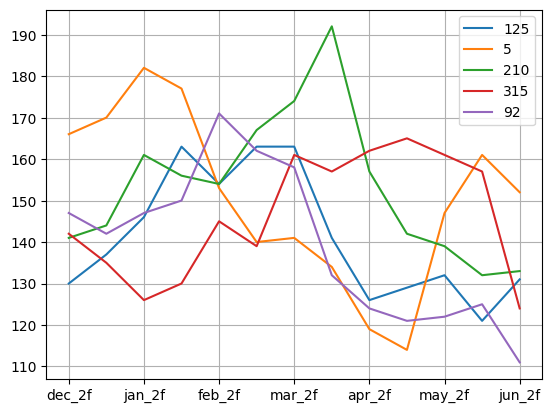

In [177]:
data = rice[rice['sowing_period']=='Unknown'].loc[:,'dec_2f':'jun_2f'].sample(5,random_state = 2)
display(data)
data.T.plot()

In [178]:
new_outliers = rice[rice.sowing_period == 'Unknown']
outliers = pd.concat([outliers, new_outliers])

# Dropping the Unknown sp labels
rice.drop(new_outliers.index, inplace=True)

display(f'{new_outliers.shape[0]} dropped', rice.loc[:,'dec_2f':'aug_2f'].describe().T)

'64 dropped'

,count,mean,std,min,25%,50%,75%,max
dec_2f,339.0,130.808260,9.472873,111.0,124.0,129.0,135.0,168.0
jan_1f,339.0,130.238938,10.252095,103.0,123.0,129.0,136.0,164.0
jan_2f,339.0,140.368732,15.962874,106.0,127.0,141.0,152.0,177.0
feb_1f,339.0,153.926254,17.571423,109.0,141.0,157.0,167.5,187.0
feb_2f,339.0,160.849558,17.107676,107.0,150.0,165.0,174.0,189.0
mar_1f,339.0,166.997050,14.432561,125.0,158.0,170.0,178.0,192.0
mar_2f,339.0,169.000000,11.471601,135.0,162.0,170.0,178.0,196.0
apr_1f,339.0,165.407080,14.194322,121.0,158.0,168.0,175.0,194.0
apr_2f,339.0,154.333333,17.806765,115.0,142.0,156.0,169.0,200.0
may_1f,339.0,137.309735,19.995745,102.0,123.0,129.0,150.0,185.0


# Determining Harvest period

In [179]:
# Getting the harvest_period fortnight labels

def harvest_period(row):
    sowing_period_idx = row.index.get_loc(row['sowing_period'])
    i = sowing_period_idx + 4
    while i < len(row.loc[:'jul_2f']):
        # print(row[i],row[i+1])
        if (row[i] < 140) & (row[i+1]<140):
            return row.index[i-1]
        i += 1
    return 'Unknown'

rice['harvest_period'] = rice.apply(harvest_period, axis=1)

rice.harvest_period.value_counts()

harvest_period
apr_2f     149
apr_1f      53
may_1f      49
may_2f      32
jun_1f      19
mar_2f      15
jun_2f       9
Unknown      7
jul_1f       4
mar_1f       2
Name: count, dtype: int64

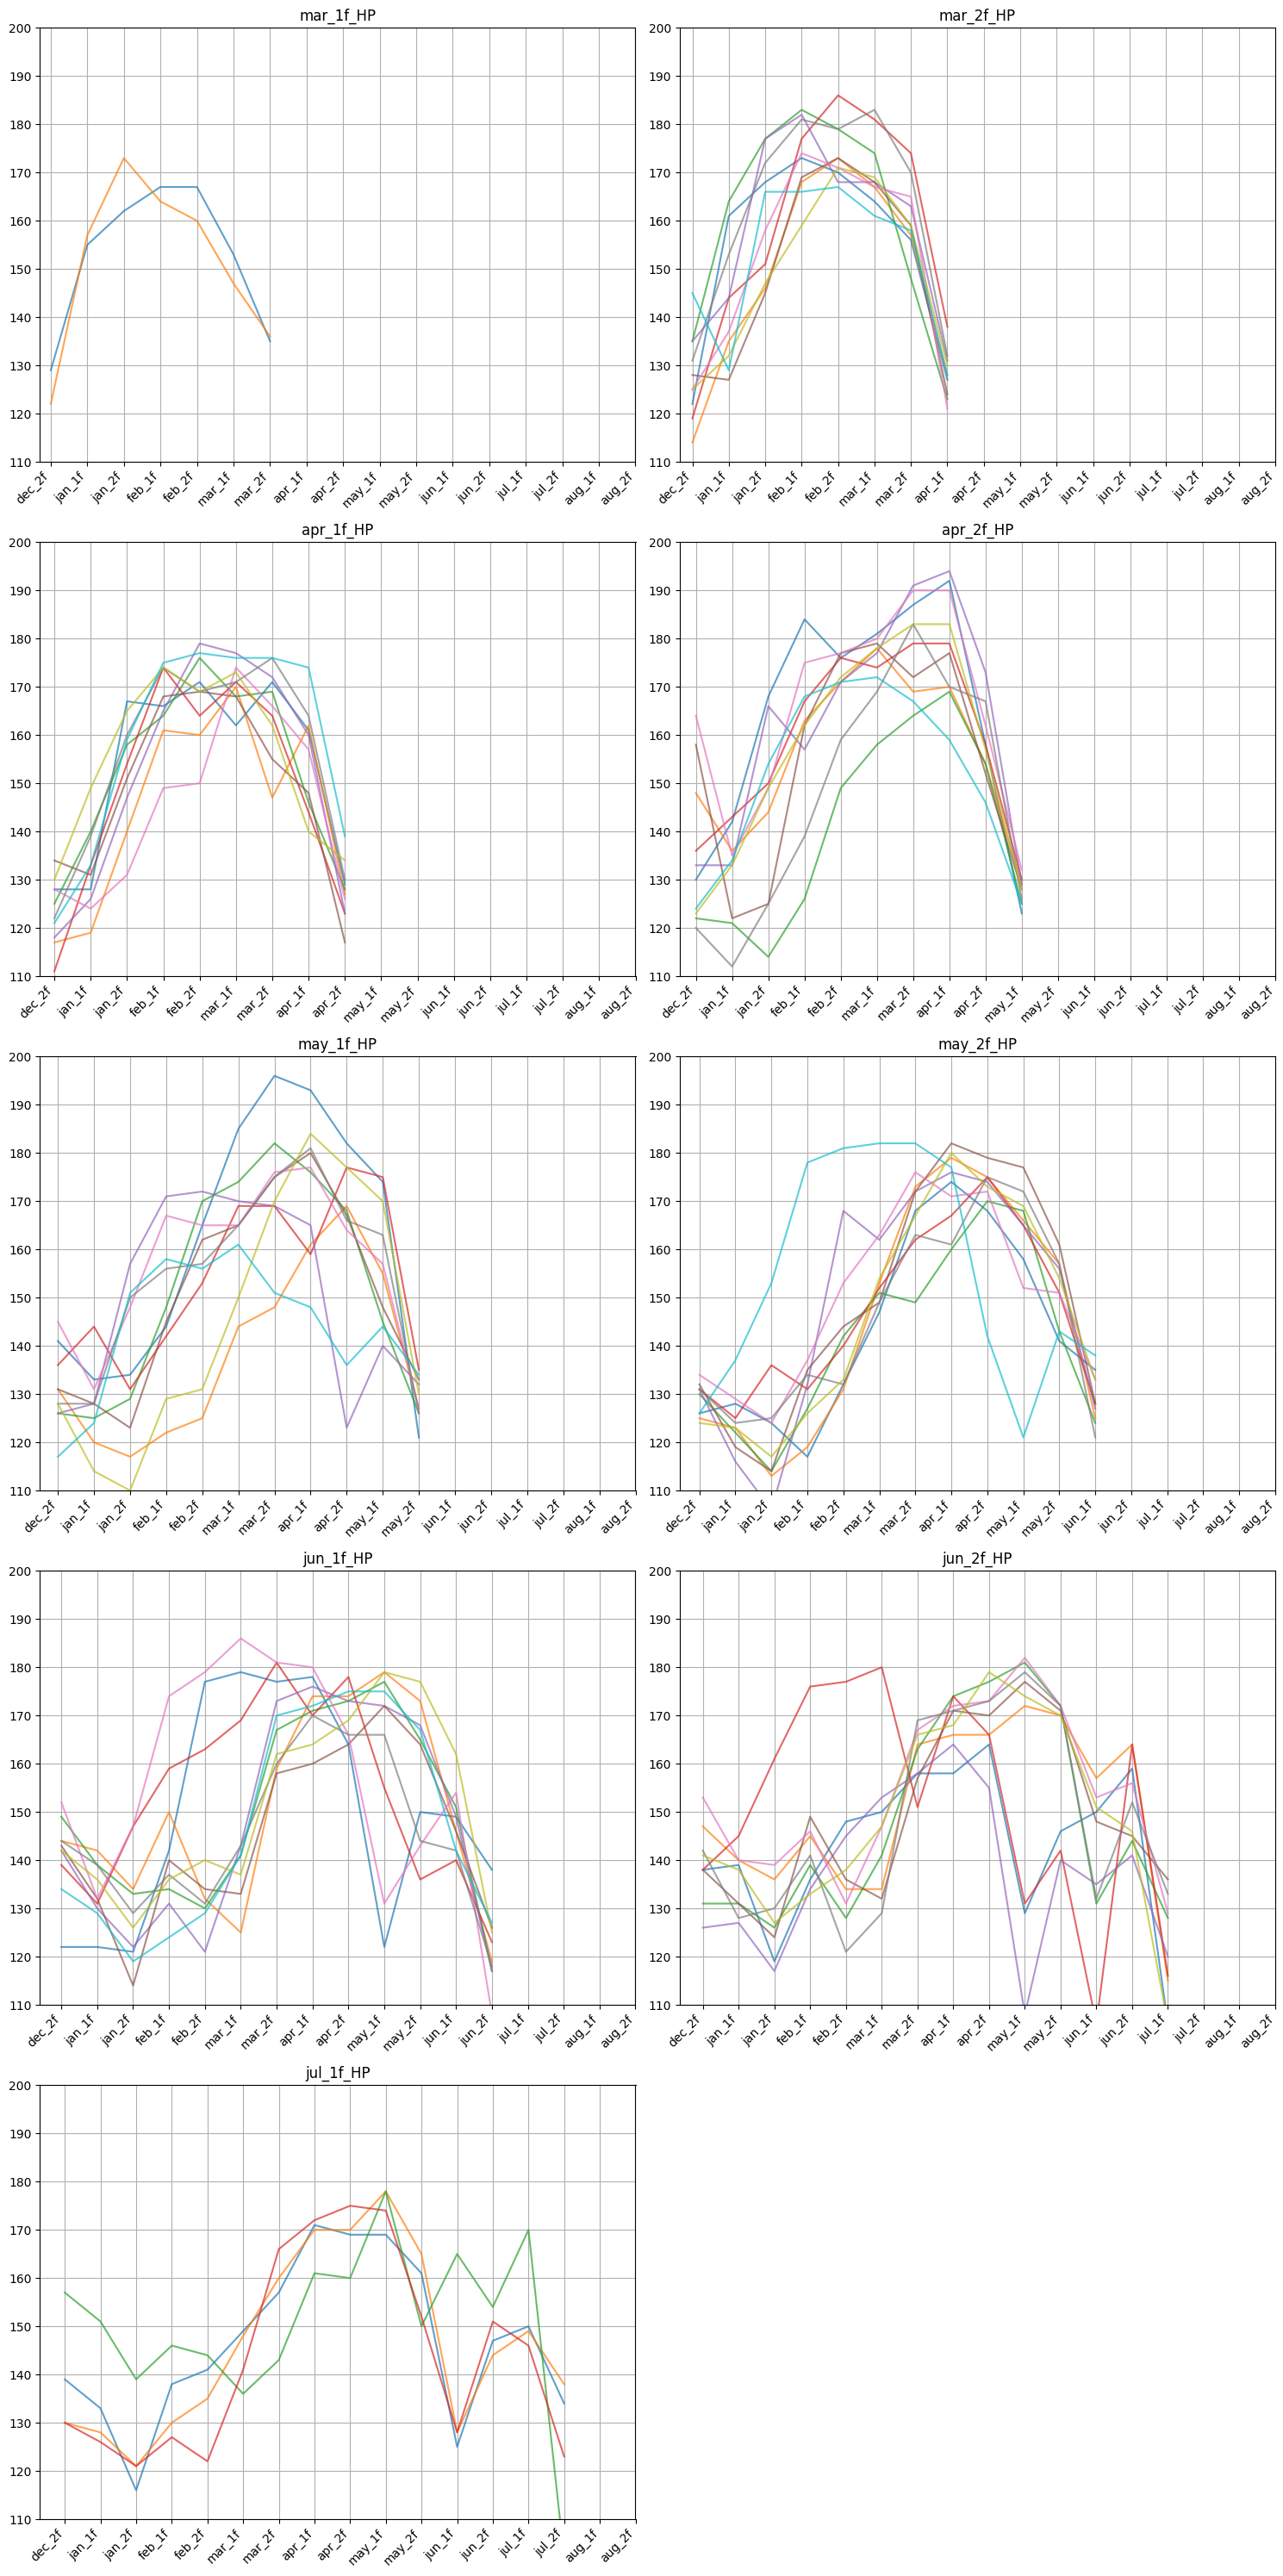

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter


# Apply Savitzky-Golay filter to each row and plot subplots based on 'sowing_period'
window_length = 5  # Adjust this value as needed
polyorder = 2  # Adjust this value as needed

# Get unique categories based on 'sowing_period'
categories = ['mar_1f','mar_2f','apr_1f','apr_2f','may_1f','may_2f','jun_1f','jun_2f','jul_1f']

mapper = {
    'mar_1f':'mar_2f','mar_2f':'apr_1f','apr_1f':'apr_2f','apr_2f':'may_1f','may_1f':'may_2f','may_2f':'jun_1f','jun_1f':'jun_2f','jun_2f':'jul_1f','jul_1f':'jul_2f'
}
# Determine the number of rows and columns for subplots
num_categories = len(categories)
num_rows = (num_categories + 1) // 2  # Round up to ensure enough rows
num_cols = 2

# Create subplots for each category in a 2-column layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot data for each category
for i, category in enumerate(categories):
        category_data = rice[rice['harvest_period'] == category].loc[:, 'dec_2f':mapper[category]]
        rows = len(category_data)
        category_data = category_data.sample(min(10,rows),random_state=42)
    
        # Plot the smoothed data for the category
        axes[i].plot(category_data.T, alpha=0.7)
        axes[i].set_title(f'{category}_HP')
        axes[i].set_xticks(np.arange(0, len(months), 1))
        axes[i].set_xticklabels(months, rotation=45, ha='right')
        axes[i].set_yticks(np.arange(60, 220, 10))
        axes[i].set_ylim([110, 200])

# Hide any remaining empty subplots
for j in range(num_categories, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [181]:
new_outliers = rice[rice.harvest_period == 'Unknown']
outliers = pd.concat([outliers, new_outliers])

# Dropping the Unknown harvest labels
rice.drop(new_outliers.index, inplace=True)

display(f'{new_outliers.shape[0]} dropped', rice.loc[:,'dec_2f':'aug_2f'].describe().T)

'7 dropped'

,count,mean,std,min,25%,50%,75%,max
dec_2f,332.0,130.710843,9.465830,111.0,124.00,129.0,135.00,168.0
jan_1f,332.0,130.132530,10.179383,103.0,123.00,128.5,136.00,164.0
jan_2f,332.0,140.500000,15.926094,106.0,127.75,141.5,152.00,177.0
feb_1f,332.0,154.012048,17.563175,109.0,141.00,157.0,167.25,187.0
feb_2f,332.0,161.135542,16.793656,119.0,150.75,166.0,174.00,189.0
mar_1f,332.0,167.102410,14.337802,125.0,158.75,170.0,178.00,192.0
mar_2f,332.0,169.048193,11.374858,135.0,162.00,170.0,178.00,196.0
apr_1f,332.0,165.385542,14.324957,121.0,158.00,168.0,176.00,194.0
apr_2f,332.0,154.283133,17.897272,115.0,142.00,156.0,169.00,200.0
may_1f,332.0,137.111446,20.019543,102.0,122.75,129.0,150.00,185.0


In [182]:
## Checking if there are rows which have max of NDVI values less than 150 for all the values between sp and hp.

def less_than_150_drop(row):
    sp_loc = row.index.get_loc(row['sowing_period'])
    hp_loc = row.index.get_loc(row['harvest_period'])
    if max(row.iloc[sp_loc+1:hp_loc]) < 150:
        return False
    return True    

new_outliers = rice[rice.apply(less_than_150_drop, axis=1) == False]
outliers = pd.concat([outliers, new_outliers])

rice = rice.drop(new_outliers.index)

display(f'{new_outliers.shape[0]} dropped', rice.loc[:,'dec_2f':'aug_2f'].describe().T)

'0 dropped'

,count,mean,std,min,25%,50%,75%,max
dec_2f,332.0,130.710843,9.465830,111.0,124.00,129.0,135.00,168.0
jan_1f,332.0,130.132530,10.179383,103.0,123.00,128.5,136.00,164.0
jan_2f,332.0,140.500000,15.926094,106.0,127.75,141.5,152.00,177.0
feb_1f,332.0,154.012048,17.563175,109.0,141.00,157.0,167.25,187.0
feb_2f,332.0,161.135542,16.793656,119.0,150.75,166.0,174.00,189.0
mar_1f,332.0,167.102410,14.337802,125.0,158.75,170.0,178.00,192.0
mar_2f,332.0,169.048193,11.374858,135.0,162.00,170.0,178.00,196.0
apr_1f,332.0,165.385542,14.324957,121.0,158.00,168.0,176.00,194.0
apr_2f,332.0,154.283133,17.897272,115.0,142.00,156.0,169.00,200.0
may_1f,332.0,137.111446,20.019543,102.0,122.75,129.0,150.00,185.0


In [183]:
display(rice.head(3))

,date_time,typeofcrop,geometry,dtname,stname,dec_2f,jan_1f,jan_2f,feb_1f,feb_2f,...,may_2f,jun_1f,jun_2f,jul_1f,jul_2f,aug_1f,aug_2f,Crop type,sowing_period,harvest_period
0,45043,paddy,POINT (81.62672456000001 16.529149009999998),West Godavari,ANDHRA PRADESH,145,122,121,130,135,...,137,119,141,145,118,125,133,Rice,jan_2f,may_1f
1,44951,paddy,POINT (76.69392186450001 15.763552200999996),Raichur,KARNATAKA,126,137,153,178,181,...,143,138,133,113,104,122,125,Rice,dec_2f,may_2f
2,44951,paddy,POINT (76.578259434 15.771603985999999),Raichur,KARNATAKA,124,149,159,173,172,...,127,121,116,123,102,124,115,Rice,dec_2f,apr_2f


In [184]:
rice.to_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/entire_rice.csv',index = 0)